In [16]:
!pip install pydicom nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.9 MB/s eta 0:00:00


In [1]:
from google.colab import drive

import pandas as pd
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import seaborn as sns
import pydicom as dcm
import numpy as np

import nibabel as nib
from nilearn import plotting
from nibabel.testing import data_path

from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
drive.mount('./content')

Mounted at ./content


In [ ]:
pd.set_option('display.max_columns', None)

# path

In [5]:
ls content/MyDrive/data

image_level_labels.csv   test_images/              train_images/
sample_submission.csv    test_series_meta.csv      train_series_meta.csv
segmentations/           train.csv
test_dicom_tags.parquet  train_dicom_tags.parquet


In [ ]:
data_path = 'content/MyDrive/data'

In [6]:
ls content/MyDrive/data/train_images

1000.dcm  1001.dcm


In [ ]:
dcm_path = 'content/MyDrive/data/train_images'

In [27]:
ls content/MyDrive/data/segmentations

10000.nii


In [ ]:
nii_path = 'content/MyDrive/data/segmentations'

# parquet 확장자

In [87]:
test_dicom = pd.read_parquet('content/MyDrive/data/test_dicom_tags.parquet')
test_dicom

,BitsAllocated,BitsStored,Columns,ContentDate,ContentTime,FrameOfReferenceUID,HighBit,ImageOrientationPatient,ImagePositionPatient,InstanceNumber,...,StudyInstanceUID,WindowCenter,WindowWidth,FileMetaInformationVersion,ImplementationClassUID,ImplementationVersionName,MediaStorageSOPClassUID,MediaStorageSOPInstanceUID,TransferSyntaxUID,path
0,16,12,512,20230722,002246.191887,1.2.826.0.1.3680043.8.498.92271913265819460212...,11,"[1, 0, 0, 0, 1, 0]","[-225.609375, -299.609375, -1099]",30,...,1.2.123.12345.1.2.3.48843,50.0,400.0,b'\x00\x01',1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.48843.1.30,1.2.840.10008.1.2.5,test_images/48843/62825/30.dcm
1,16,16,512,20230722,003830.929278,1.2.826.0.1.3680043.8.498.70045142309401550406...,15,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...","[-214.26, -203.431, -172.802]",30,...,1.2.123.12345.1.2.3.50046,50.0,400.0,b'\x00\x01',1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.50046.1.30,1.2.840.10008.1.2.5,test_images/50046/24574/30.dcm
2,16,12,512,20230722,005441.112500,1.2.826.0.1.3680043.8.498.64877973120200061370...,11,"[1, 0, 0, 0, 1, 0]","[-179.1416015625, -343.1416015625, -477]",30,...,1.2.123.12345.1.2.3.63706,50.0,400.0,b'\x00\x01',1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.63706.1.30,1.2.840.10008.1.2.5,test_images/63706/39279/30.dcm


In [10]:
train_dicom = pd.read_parquet('content/MyDrive/data/train_dicom_tags.parquet')
train_dicom

,BitsAllocated,BitsStored,Columns,ContentDate,ContentTime,FrameOfReferenceUID,HighBit,ImageOrientationPatient,ImagePositionPatient,InstanceNumber,...,WindowCenter,WindowWidth,FileMetaInformationVersion,ImplementationClassUID,ImplementationVersionName,MediaStorageSOPClassUID,MediaStorageSOPInstanceUID,TransferSyntaxUID,path,RescaleType
0,16,16,512,20230722,003306.881589,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1459.20]",532,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.532,1.2.840.10008.1.2.5,train_images/49954/41479/532.dcm,nan
1,16,16,512,20230722,003303.279137,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1474.40]",513,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.513,1.2.840.10008.1.2.5,train_images/49954/41479/513.dcm,nan
2,16,16,512,20230722,003343.090736,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1310.40]",718,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.718,1.2.840.10008.1.2.5,train_images/49954/41479/718.dcm,nan
3,16,16,512,20230722,003252.960345,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1520.00]",456,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.456,1.2.840.10008.1.2.5,train_images/49954/41479/456.dcm,nan
4,16,16,512,20230722,003155.059398,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1756.00]",161,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.161,1.2.840.10008.1.2.5,train_images/49954/41479/161.dcm,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510368,16,16,512,20230721,232417.445248,1.2.826.0.1.3680043.8.498.52191713988172484273...,15,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...","[-183.000, -201.930, -410.232]",167,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.3964.1.167,1.2.840.10008.1.2.5,train_images/3964/6179/167.dcm,HU
1510369,16,16,512,20230721,232349.815191,1.2.826.0.1.3680043.8.498.52191713988172484273...,15,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...","[-183.000, -201.930, -17.732]",10,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.3964.1.10,1.2.840.10008.1.2.5,train_images/3964/6179/10.dcm,HU
1510370,16,16,512,20230721,232357.288770,1.2.826.0.1.3680043.8.498.52191713988172484273...,15,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...","[-183.000, -201.930, -125.232]",53,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.3964.1.53,1.2.840.10008.1.2.5,train_images/3964/6179/53.dcm,HU
1510371,16,16,512,20230721,232348.485715,1.2.826.0.1.3680043.8.498.52191713988172484273...,15,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...","[-183.000, -201.930, -0.232]",3,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.3964.1.3,1.2.840.10008.1.2.5,train_images/3964/6179/3.dcm,HU


In [104]:
len(test_dicom.columns), len(train_dicom.columns)

(35, 35)

In [70]:
train_dicom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510373 entries, 0 to 1510372
Data columns (total 35 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   BitsAllocated               1510373 non-null  int64  
 1   BitsStored                  1510373 non-null  int64  
 2   Columns                     1510373 non-null  int64  
 3   ContentDate                 1510373 non-null  object 
 4   ContentTime                 1510373 non-null  object 
 5   FrameOfReferenceUID         1510373 non-null  object 
 6   HighBit                     1510373 non-null  int64  
 7   ImageOrientationPatient     1510373 non-null  object 
 8   ImagePositionPatient        1510373 non-null  object 
 9   InstanceNumber              1510373 non-null  int64  
 10  KVP                         1510373 non-null  float64
 11  PatientID                   1510373 non-null  object 
 12  PatientPosition             1510373 non-null  object 
 1

In [71]:
train_dicom.columns

Index(['BitsAllocated', 'BitsStored', 'Columns', 'ContentDate', 'ContentTime',
       'FrameOfReferenceUID', 'HighBit', 'ImageOrientationPatient',
       'ImagePositionPatient', 'InstanceNumber', 'KVP', 'PatientID',
       'PatientPosition', 'PhotometricInterpretation', 'PixelRepresentation',
       'PixelSpacing', 'RescaleIntercept', 'RescaleSlope', 'Rows',
       'SOPInstanceUID', 'SamplesPerPixel', 'SeriesInstanceUID',
       'SeriesNumber', 'SliceThickness', 'StudyInstanceUID', 'WindowCenter',
       'WindowWidth', 'FileMetaInformationVersion', 'ImplementationClassUID',
       'ImplementationVersionName', 'MediaStorageSOPClassUID',
       'MediaStorageSOPInstanceUID', 'TransferSyntaxUID', 'path',
       'RescaleType'],
      dtype='object')

In [92]:
train_dicom.isnull().sum()

BitsAllocated                 0
BitsStored                    0
Columns                       0
ContentDate                   0
ContentTime                   0
FrameOfReferenceUID           0
HighBit                       0
ImageOrientationPatient       0
ImagePositionPatient          0
InstanceNumber                0
KVP                           0
PatientID                     0
PatientPosition               0
PhotometricInterpretation     0
PixelRepresentation           0
PixelSpacing                  0
RescaleIntercept              0
RescaleSlope                  0
Rows                          0
SOPInstanceUID                0
SamplesPerPixel               0
SeriesInstanceUID             0
SeriesNumber                  0
SliceThickness                0
StudyInstanceUID              0
WindowCenter                  0
WindowWidth                   0
FileMetaInformationVersion    0
ImplementationClassUID        0
ImplementationVersionName     0
MediaStorageSOPClassUID       0
MediaSto

In [97]:
train_dicom.describe()

,BitsAllocated,BitsStored,Columns,HighBit,InstanceNumber,KVP,PixelRepresentation,RescaleIntercept,RescaleSlope,Rows,SamplesPerPixel,SeriesNumber,SliceThickness,WindowCenter,WindowWidth
count,1510373.0,1.510373e+06,1.510373e+06,1.510373e+06,1.510373e+06,1.510373e+06,1.510373e+06,1.510373e+06,1510373.0,1.510373e+06,1510373.0,1.510373e+06,1.510373e+06,1510373.0,1510373.0
mean,16.0,1.424738e+01,5.153324e+02,1.324738e+01,3.253483e+02,1.162570e+02,5.619274e-01,-8.316847e+02,1.0,5.120702e+02,1.0,7.229097e+01,1.678620e+00,50.0,400.0
std,0.0,1.966167e+00,2.906991e+01,1.966167e+00,2.517103e+02,1.120121e+01,4.961503e-01,1.870392e+03,0.0,6.584211e+00,0.0,1.764613e+02,1.000825e+00,0.0,0.0
min,16.0,1.200000e+01,4.820000e+02,1.100000e+01,1.000000e+00,7.000000e+01,0.000000e+00,-3.276800e+04,1.0,4.820000e+02,1.0,0.000000e+00,5.000000e-01,50.0,400.0
25%,16.0,1.200000e+01,5.120000e+02,1.100000e+01,1.220000e+02,1.200000e+02,0.000000e+00,-1.024000e+03,1.0,5.120000e+02,1.0,4.000000e+00,1.000000e+00,50.0,400.0
50%,16.0,1.600000e+01,5.120000e+02,1.500000e+01,2.560000e+02,1.200000e+02,1.000000e+00,-1.024000e+03,1.0,5.120000e+02,1.0,6.000000e+00,1.000000e+00,50.0,400.0
75%,16.0,1.600000e+01,5.120000e+02,1.500000e+01,4.890000e+02,1.200000e+02,1.000000e+00,0.000000e+00,1.0,5.120000e+02,1.0,1.200000e+01,2.500000e+00,50.0,400.0
max,16.0,1.600000e+01,1.024000e+03,1.500000e+01,1.971000e+03,1.500000e+02,1.000000e+00,0.000000e+00,1.0,1.024000e+03,1.0,1.802000e+03,5.000000e+00,50.0,400.0


In [74]:
train_dicom.hist();

<IPython.core.display.Javascript object>

In [84]:
sns.pairplot(train_dicom[['ContentDate', 'ContentTime', 'FrameOfReferenceUID', 'HighBit', 'ImageOrientationPatient']]);

<IPython.core.display.Javascript object>

# nii 확장자

In [29]:
img = nib.load('content/MyDrive/data/segmentations/10000.nii')
img

In [30]:
nib.is_proxy(img)

False

In [31]:
nib.is_proxy(img.dataobj)

True

In [32]:
img.dataobj

In [33]:
img.get_fdata()

memmap([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [34]:
img.get_fdata().shape

(512, 512, 483)

In [42]:
img_arr = img.get_data()
img_arr

<ipython-input-42-688c0d8f44cc>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img_arr = img.get_data()


memmap([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [43]:
img_arr.shape

(512, 512, 483)

In [44]:
def show_plane(ax, plane, cmap="gray", title=None):
     ax.imshow(plane, cmap=cmap)
     ax.axis("off")

     if title:
         ax.set_title(title)

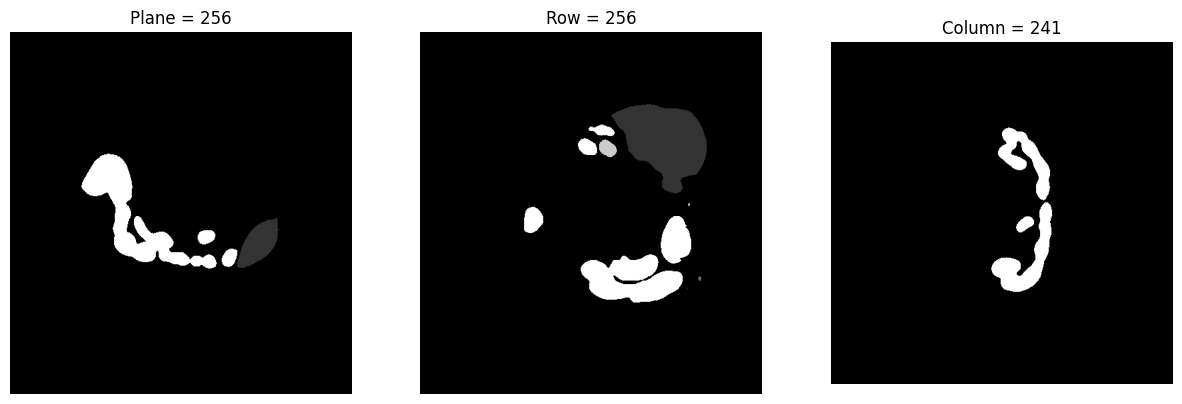

In [45]:
(n_plane, n_row, n_col) = img_arr.shape
_, (a, b, c) = plt.subplots(ncols=3, figsize=(15, 5))

show_plane(a, img_arr[n_plane // 2], title=f'Plane = {n_plane // 2}')
show_plane(b, img_arr[:, n_row // 2, :], title=f'Row = {n_row // 2}')
show_plane(c, img_arr[:, :, n_col // 2], title=f'Column = {n_col // 2}')

In [48]:
a, b, c

(<Axes: title={'center': 'Plane = 256'}>,
 <Axes: title={'center': 'Row = 256'}>,
 <Axes: title={'center': 'Column = 241'}>)

# dcm 확장자

In [19]:
raw_file = dcm.read_file("content/MyDrive/data/train_images/1000.dcm")
raw_file

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.123.12345.1.2.3.10004.1.1000
(0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
(0002, 0012) Implementation Class UID            UI: 1.2.3.123456.4.5.1234.1.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.4.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.123.12345.1.2.3.10004.1.1000
(0008, 0023) Content Date                        DA: '20230721'
(0008, 0033) Content Time                        TM: '232531.265856'
(0010, 0020) Patient ID                          LO: '10004'
(0018, 0050) Slice Thickness                     DS: '1.0'
(0018, 0060) KVP                                 DS: '90.0'
(0018, 5100) Patient Position                    CS: 'HFS'
(002

In [21]:
raw_file.pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [24]:
len(raw_file)

29